In [34]:
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os
import json

In [35]:
images_dir = "test_images"
labels_dir = "test_labels"

def center_crop_and_resize(image_path, target_size=(224, 224)):
    """
    Crops the center square of an image and resizes it to the target size.

    Args:
        image_path (str): Path to the input image.
        target_size (tuple): Target size for resizing (width, height).

    Returns:
        PIL.Image.Image: The cropped and resized image.
    """

    image = Image.open(image_path)
    width, height = image.size

    # Calculate the cropping box for a center square
    min_dim = min(width, height)
    left = (width - min_dim) // 2
    top = (height - min_dim) // 2
    right = left + min_dim
    bottom = top + min_dim

    # Crop the center square
    image = image.crop((left, top, right, bottom))

    # Resize to the target size
    image = image.resize(target_size, Image.Resampling.LANCZOS)
    image = np.asarray(image)

    # image = np.expand_dims(image, axis=0) # Add batch dimension

    return image 

# Load dataset
def load_dataset(images_dir, labels_dir):
    images = []
    labels = []
    for image_file in os.listdir(images_dir):
        if image_file.endswith(".jpg"):
            image_path = os.path.join(images_dir, image_file)
            label_path = os.path.join(labels_dir, image_file.replace(".jpg", ".json"))

            # Load and preprocess image
            image = center_crop_and_resize(image_path)  # Resize for ResNet50
            images.append(np.array(image) / 255.0)  # Normalize to [0, 1]

            # Load label
            with open(label_path, 'r') as f:
                label = json.load(f)
                labels.append([label["red_count"], label["green_count"], label["blue_count"]])

    return np.array(images), np.array(labels)

images, labels = load_dataset(images_dir, labels_dir)

print(images.shape)

(6, 224, 224, 3)


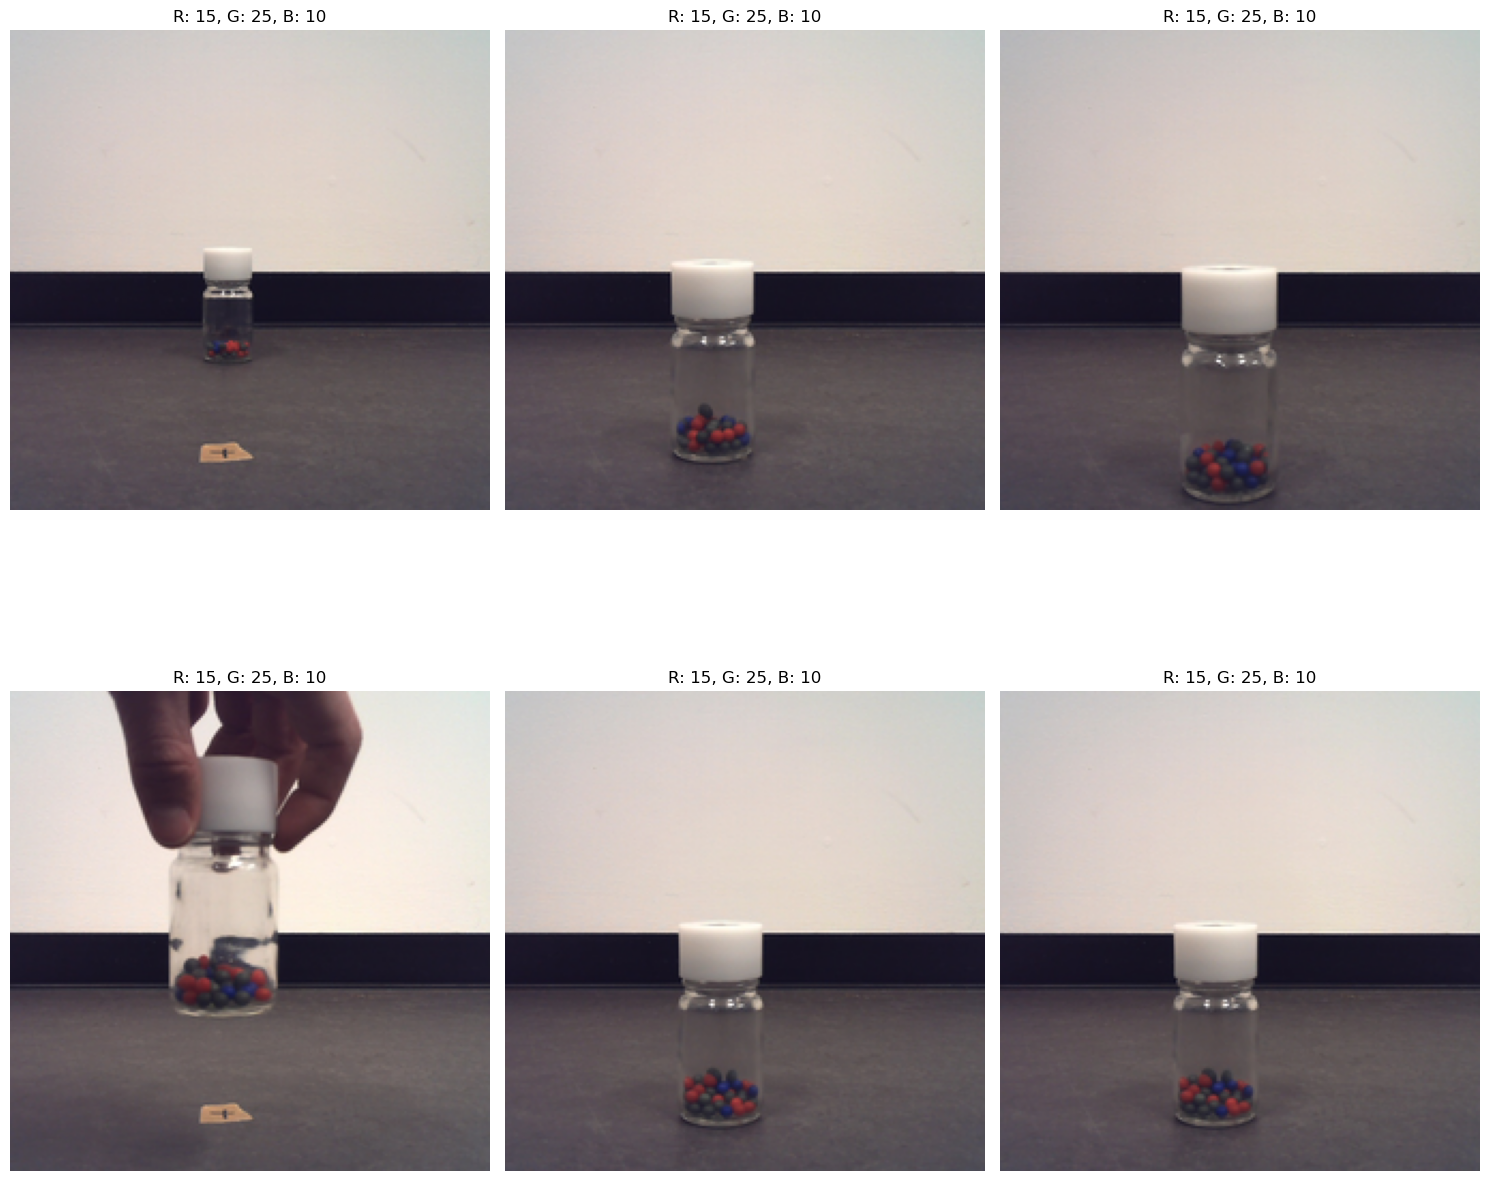

In [36]:
# Create a 5x5 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# Flatten the axes for easier iteration
axs = axs.flatten()

# Plot the first 25 images and their labels
for idx, (image, label) in enumerate(zip(images, labels)):
    axs[idx].imshow(image)
    axs[idx].set_title(f"R: {label[0]}, G: {label[1]}, B: {label[2]}")
    axs[idx].axis("off")  # Remove axes for clarity

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [37]:
model = tf.keras.models.load_model('models/resnet50_model_v4.keras')
print("Model loaded...")

Model loaded...


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[ 9.366577  11.19842   10.7522745]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[ 9.337087 11.147266 10.700057]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[ 9.321182 11.125572 10.674183]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[ 9.72049  11.597532 11.071443]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[ 9.311918  11.115562  10.6703005]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[ 9.315459 11.11989  10.67416 ]]


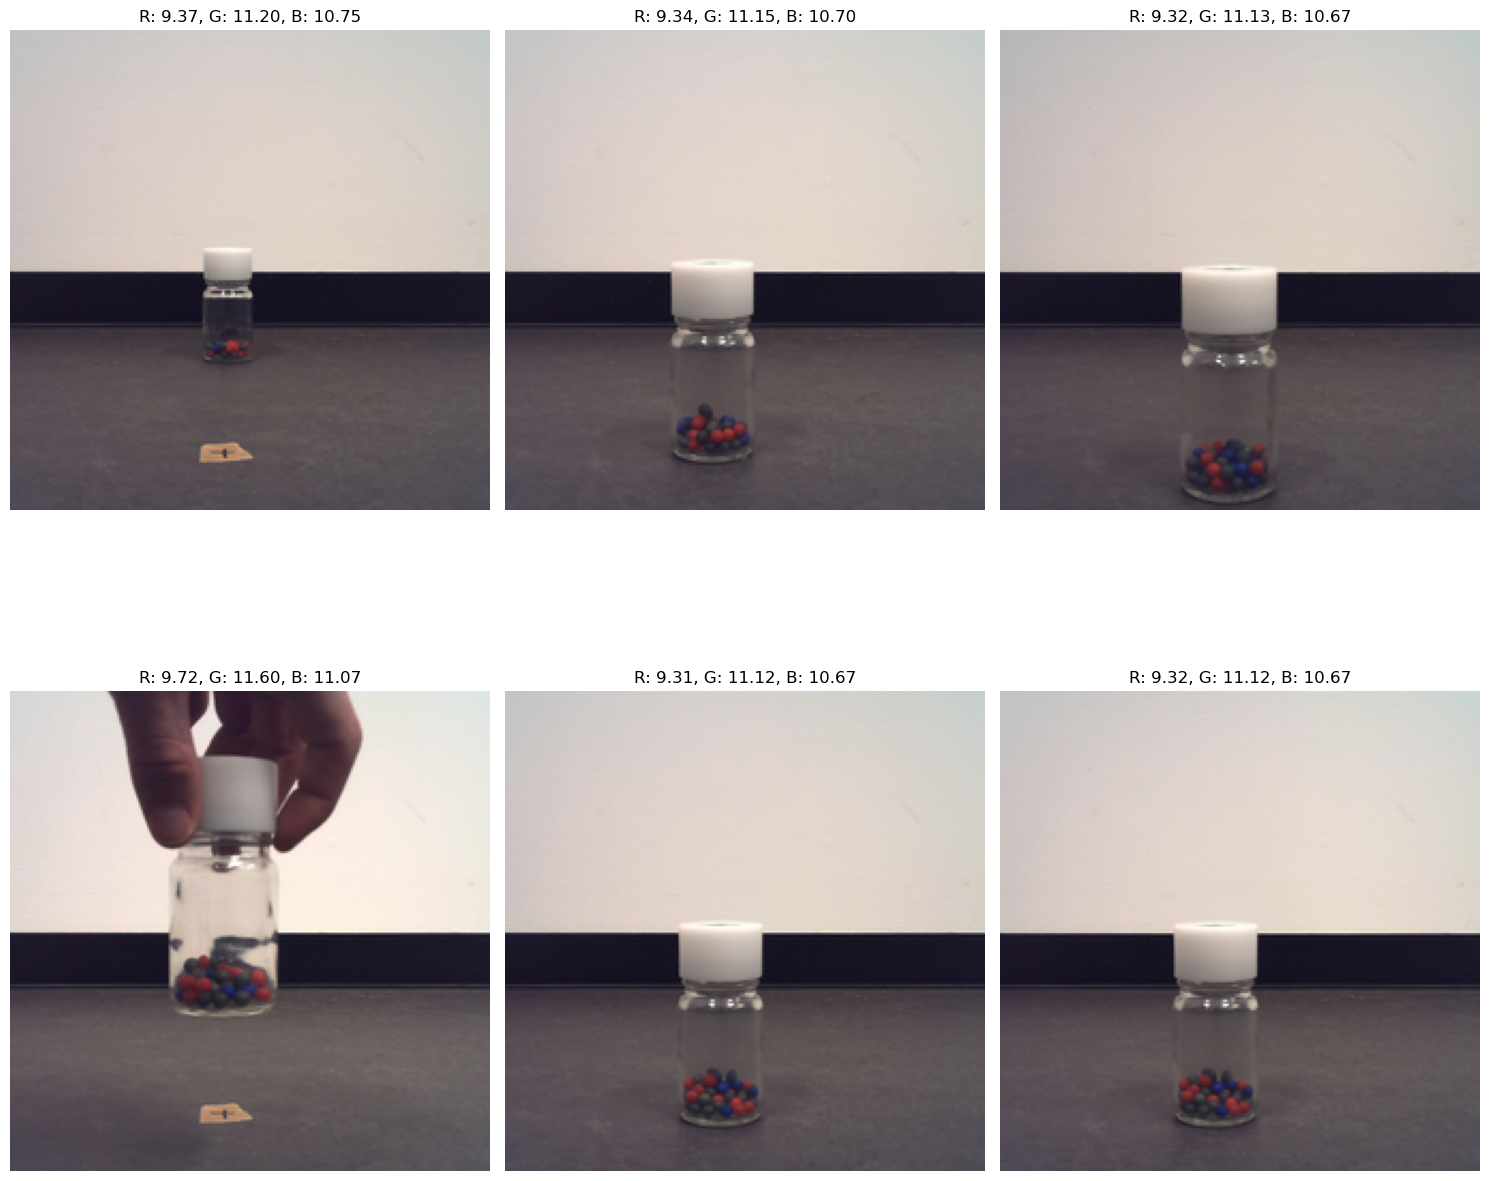

In [38]:
predictions = []

for img in images:
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    print(prediction)
    predictions.append((img, prediction[0]))

# Create a 5x5 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# Flatten the axes for easier iteration
axs = axs.flatten()

# Plot the first 25 images and their labels
for idx, (image, prediction) in enumerate(predictions):
    axs[idx].imshow(image[0])
    axs[idx].set_title(f"R: {prediction[0]:.2f}, G: {prediction[1]:.2f}, B: {prediction[2]:.2f}")    
    axs[idx].axis("off")  # Remove axes for clarity

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()